In [36]:
import numpy as np
import pandas as pd


data = pd.read_csv("../data/clean_weather.csv",index_col=0)

data.ffill()

data


,tmax,tmin,rain,tmax_tomorrow
1970-01-01,60.0,35.0,0.0,52.0
1970-01-02,52.0,39.0,0.0,52.0
1970-01-03,52.0,35.0,0.0,53.0
1970-01-04,53.0,36.0,0.0,52.0
1970-01-05,52.0,35.0,0.0,50.0
...,...,...,...,...
2022-11-22,62.0,35.0,0.0,67.0
2022-11-23,67.0,38.0,0.0,66.0
2022-11-24,66.0,41.0,0.0,70.0
2022-11-25,70.0,39.0,0.0,62.0


In [37]:
data['tmax'].head(10)

1970-01-01    60.0
1970-01-02    52.0
1970-01-03    52.0
1970-01-04    53.0
1970-01-05    52.0
1970-01-06    50.0
1970-01-07    52.0
1970-01-08    56.0
1970-01-09    54.0
1970-01-10    57.0
Name: tmax, dtype: float64

In [38]:
np.random.seed(0)


## 输入矩阵
i_weight = np.random.rand(1,2)
## 隐藏矩阵
h_weight = np.random.rand(2,2)
## 输出矩阵
o_weight = np.random.rand(2,1)

temps = data['tmax'].tail(3).to_numpy()
temps



array([66., 70., 62.])

In [39]:
x0 = temps[0].reshape(1,1)
x1 = temps[1].reshape(1,1)
x2 = temps[2].reshape(1,1)
x0


array([[66.]])

### 计算在t0时刻的相关值

In [40]:
# 输入矩阵叉乘输入矩阵
xi_0 = x0 @ i_weight
xi_0
# a = np.array([[1,2],[3,4]])
# b = np.array([[5,6,7,1],[3,8,9,10]])
# print(a@b)

array([[36.22169126, 47.20249818]])

In [41]:
###第一个输入时，初始化上一时间的隐藏层
## np.maximum 类似 relu非线性激活函数
xh_0 = np.maximum(0,xi_0)
xh_0

array([[36.22169126, 47.20249818]])

In [42]:
# 计算输出,也就是计算预测值
xo_0 =xh_0 @ o_weight
xo_0

array([[57.94406231]])

### 计算在t1时刻的相关值

In [43]:

###计算在t1时刻x1的值
xi_1 = x1 @ i_weight
## 计算t0时刻的隐藏层输出
xh = xh_0 @ h_weight 
## 计算t1时刻隐藏层的输出 ,使用非线性激活函数
xh_1 = np.maximum(0,xh+ xi_1)
xo_1 = xh_1 @ o_weight
xo_1

array([[124.54916092]])

### 计算在t2时刻的相关值

In [44]:
xi_2 = x2 @ i_weight
xh = xh_1 @ h_weight
xh_2 = np.maximum(0,xh + xi_2)
xo_2 = xh_2 @ o_weight
xo_2

array([[190.94853131]])

#### relu 激活函数的优缺点
- relu 函数不会缩放输入,只是把小于0的值，设为0.这回是的隐藏层，变得越来越大。
这也意味着，我们的预测值，会越来越大。
- 所以在循环神经网络中，我们使用的激活函数时双曲正切
![Alt text](image.png)


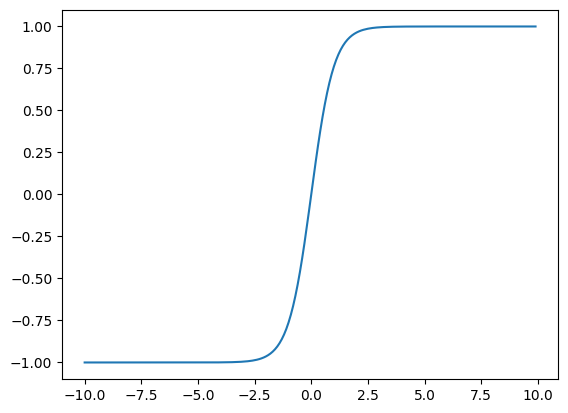

In [45]:
### 使用tanh函数收缩 数据
import matplotlib.pyplot as plt
### 生成一个-10 到10之间的数组
temps = np.arange(-10,10,.1)
plt.plot(temps,np.tanh(temps))

In [46]:
### 使用sympy 进行微分
from sympy import diff ,symbols ,exp

x = symbols('x')
sympy_tanh = (exp(x) - exp(-x)) / (exp(x) + exp(-x))
diff(sympy_tanh,x)

(-exp(x) + exp(-x))*(exp(x) - exp(-x))/(exp(x) + exp(-x))**2 + 1

$1 - \tanh^2{x}$

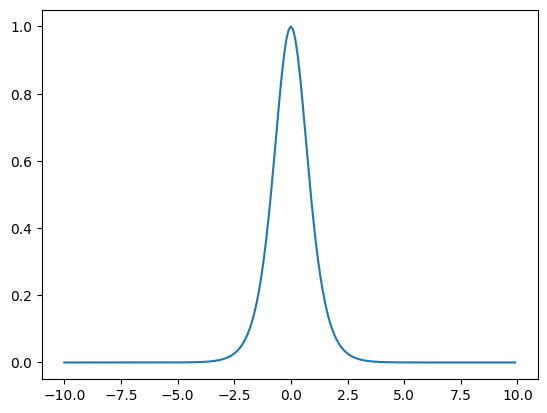

In [47]:
## 绘制双曲正切函数的导数的图像
plt.plot(temps,1-np.tanh(temps) **2)

### 全向前传播 full forward pass

In [48]:
np.random.seed(0)
i_weight = np.random.rand(1, 5) / 5 - 0.1
h_weight = np.random.rand(5, 5) / 5 - 0.1
h_bias = np.random.rand(1, 5) / 5 - 0.1

o_weight = np.random.rand(5, 1) * 50
o_bias = np.random.rand(1, 1)

outputs = np.zeros(3)
hiddens = np.zeros((3, 5))
prev_hidden = None
sequence = data["tmax"].tail(3).to_numpy()

for i in range(3):
    x = sequence[i].reshape(1, 1)

    xi = x @ i_weight

    # 如果上一时刻的hidden为空，则当前节点的隐藏层为：
    # 输入x @ 输入矩阵 也就是 xi
    if prev_hidden is None:
        prev_xh = xi
    ## 不为空时，则为
    ##  输入矩阵 @ 输入权重i_weight + 上一时刻隐藏 @ 隐藏权重矩阵 + 隐藏偏执
    else:
        prev_xh = xi + prev_hidden @ h_weight + h_bias
    ## 激活函数激活隐藏
    xh = np.tanh(prev_xh)

    prev_hidden = xh
    hiddens[i,] = xh
    xo = xh @ o_weight + o_bias
    # print(xo)
    outputs[i] = xo

outputs

array([74.31470595, 80.66149404, 77.67852446])

In [49]:
hiddens

array([[ 0.56784618,  0.99320288,  0.87557333,  0.53166114, -0.76483255],
       [ 0.58366756,  0.99568651,  0.90034879,  0.69338529, -0.84149203],
       [ 0.5383306 ,  0.99164251,  0.86287584,  0.66091071, -0.80543591]])

### 向后传播
![Alt text](image-1.png)

In [50]:

### 均方误差损失函数
def mse(actual,predicted):
    return np.mean((actual - predicted)**2)

### 损失函数的导数
def mse_grad(actual,predicted):
    return (predicted - actual)

### 真实值
actuals = np.array([70,62,65])

### 计算梯度
loss_grad= mse_grad(actuals,outputs)

loss_grad

array([ 4.31470595, 18.66149404, 12.67852446])

### 反向传播示意图
![Alt text](image-2.png)

In [51]:
for i in range(2,-3,-1):
    print(i)

2
1
0
-1
-2


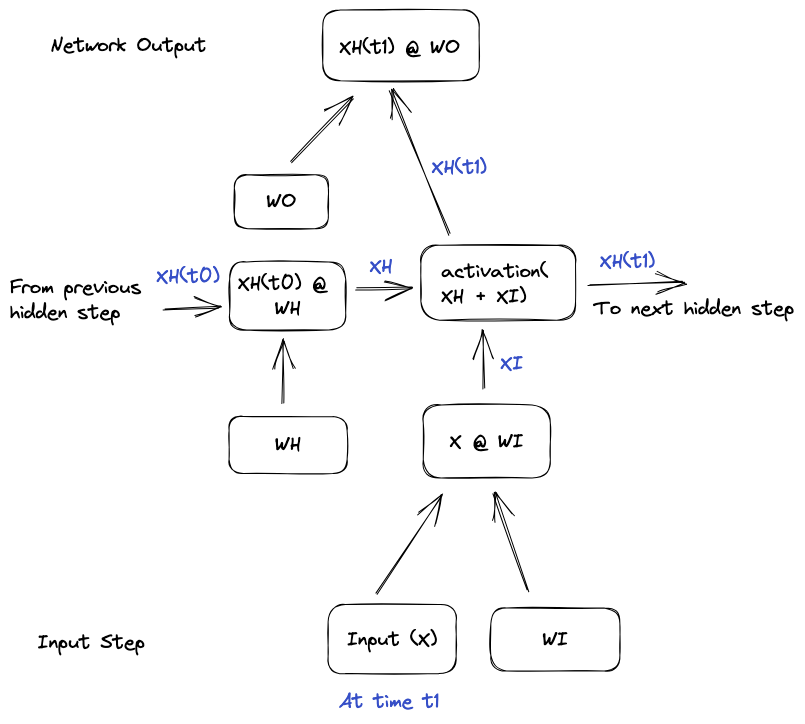

### 反向传播过程

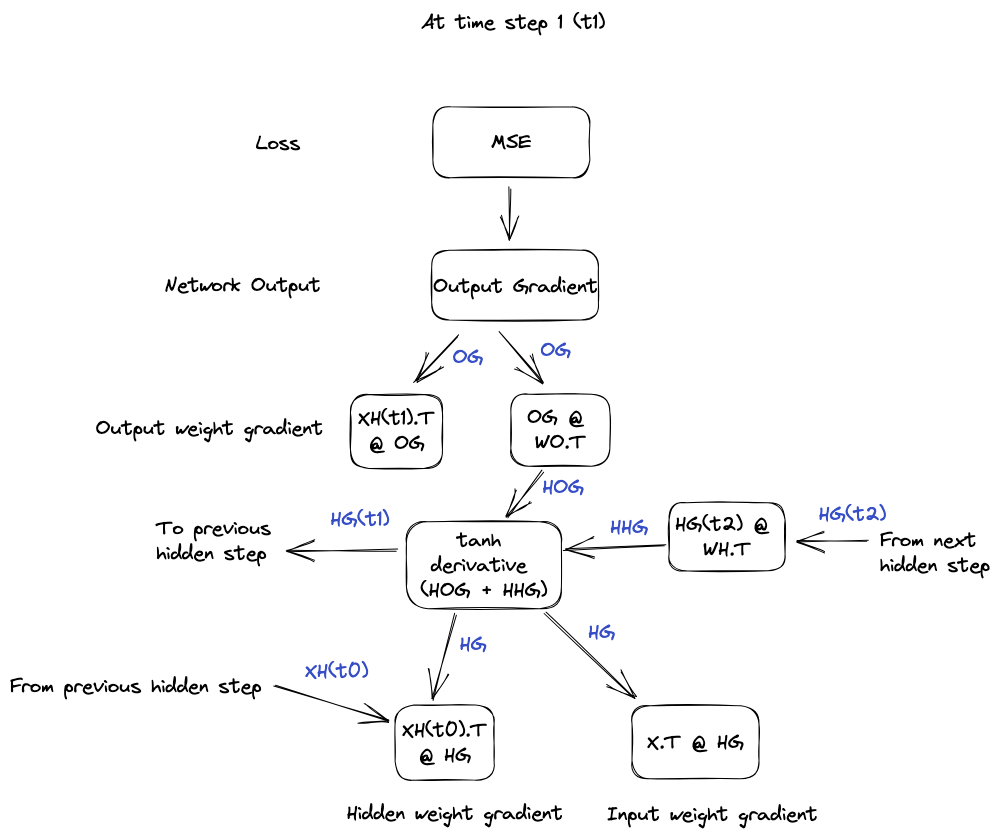

In [52]:

## 我们从最后一序列位置 向后循环到第一个序列
## 我们保持跟踪下一个 隐藏状态
## 计算各个权重和偏置的梯度

next_hidden =None

o_weight_grad , o_bias_grad ,h_weight_grad,h_bias_grad,i_weight_grad = [0] *5
 
for i in range(2,-1,-1):
    l_grad = loss_grad[i].reshape(1,1)
    
    # 计算输出权重梯度 
    o_weight_grad += hiddens[i][:,np.newaxis] @ l_grad

    o_bias_grad += np.mean(l_grad)
    
    # 上一层输出的梯度
    o_grad = l_grad @ o_weight.T

    if next_hidden is  None:
        h_grad = o_grad
    else:
        h_grad = o_grad + next_hidden @ h_weight.T
    
    tanh_deriv = 1 - hiddens[i,:][np.newaxis,:]
    
    h_grad  =np.multiply(h_grad,tanh_deriv)
    
    next_hidden = h_grad
    
    if i > 0:
        h_weight_grad += hiddens[i-1,:][:,np.newaxis] @ h_grad
        h_bias_grad += np.mean(h_grad) 

    print(i_weight_grad)

    i_weight_grad += sequence[i].reshape(1,1).T @ h_grad

i_weight_grad    


0
[[11207.11290299   201.05988734  3324.93453109 12577.68041163
  48381.84313673]]
[[ 28295.46986031    361.91934701   7740.54545568  30810.03472716
  130023.91284399]]


array([[ 32352.67091083,    392.99655233,   9528.43418739,
         35514.29142052, 146401.10347147]])

### 计算输出梯度
```python
 o_weight_grad += hiddens[i][:,np.newaxis] @ l_grad
```
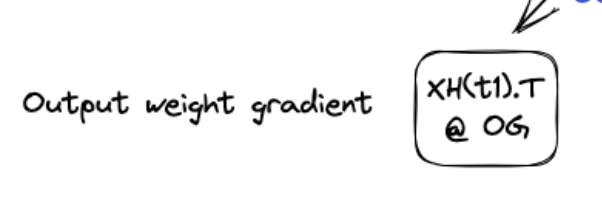

In [53]:
### 根据梯度更新权重
##### 定义学习率
lr = 1e-6
i_weight -= i_weight_grad * lr

h_bias -= h_bias_grad *lr
o_weight -= o_weight_grad * lr
o_bias = o_bias_grad *lr


1e-06